- The project aims to analyze the content available on Netflix across different countries.
- The data will be clustered based on user preferences to enhance the recommendation system.
- Additionally, the project will compare Netflix's emphasis on TV shows versus movies over different years.

The source of data is kaggle which is publicly available on the kaggle website.

**About this Dataset**: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**The dataset contains 8807 records and 12 attributes**

**Information of Attributes**
1. **show_id**: Unique ID for every Movie/TV shows
2. **type**: Wheather a Movie or a TV show
3. **title**: Title of the Movie/TV show
4. **director**: Director of the Movie
5. **cast**: Actors broadcasted in the movie / show
6. **country**: From which country the movie / show was produced
7. **date_added** : Date it was added in Netflix
8. **release_year** : Actual Release year of the movie / show
9. **rating** : TV rating of the movie / show
10. **duration**: Total duration - minutes for movies or number of seasons for TV shows
11. **listed_in** : Genre
12. **Discription** : The summary description

#### Making change 
- I am adding year_added, month_added, month_name, by converting date_added and I am taking out seasons from duration for TV Show.
- There are some contents which are made or filmed in multiple countries, also some content with multiple genre associate with it. To simplify analysis I am considering only the primary country where that respective movie/TV Show was filmed. Likewise, I am considering only the primary genre of the respective movie/TV Show.

In [5]:
# Strip white space from date_added column
df['date_added'] = df['date_added'].str.strip()

# Convert date_added to datetime and extract year_added and month_added
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()



# Season count and duration of TV shows
df['season_count'] = df.apply(lambda x: str(x['duration']).split(" ")[0] if "Season" in str(x['duration']) else "", axis=1)
df['duration'] = df.apply(lambda x: str(x['duration']).split(" ")[0] if "Season" not in str(x['duration']) else "", axis=1)

df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_name_added,season_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,September,
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,September,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,September,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,September,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,September,2


In [6]:
## Choosing primary country and primary genre.
def split_first(value):
    if isinstance(value, str):
        return value.split(',')[0]
    return value
df['country'] = df['country'].apply(split_first)
df['listed_in']= df['listed_in'].apply(split_first)

In [7]:
# Missing Data
df.isna().sum()

show_id                0
type                   0
title                  0
director            2634
cast                 825
country              831
date_added            10
release_year           0
rating                 4
duration               0
listed_in              0
description            0
year_added            10
month_added           10
month_name_added      10
season_count           0
dtype: int64

In [8]:
# Missing data in percentage
for i in df:
    null_rate = df[i].isna().sum()/ len(df)*100
    if null_rate>0:
        print('{} null rate: {}%'.format(i, round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
year_added null rate: 0.11%
month_added null rate: 0.11%
month_name_added null rate: 0.11%


<br>

# Exploratory Data Analysis (EDA)

### 1. Content types in Netflix

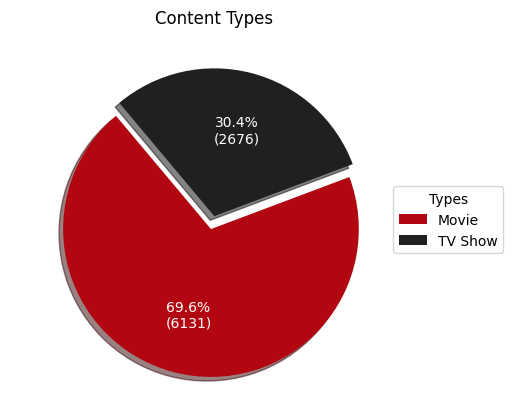

In [9]:
counts = df['type'].value_counts()
values = counts.values

# Customizing autopct
def my_autopct(pct):
    total =sum(values)
    val = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({val:d})'

colors={'Movie': "#b20710", 'TV Show':"#221f1f"}

counts.plot.pie(
    startangle=130,
    autopct=my_autopct, 
    explode=(0.09, 0), 
    shadow=True,
    colors=[colors[key] for key in counts.index],
)

# Manually adding the autopct labels with the desired color
for i, text in enumerate(plt.gca().texts):
    text.set_color('white')

plt.title("Content Types", color='black');
plt.ylabel(' ')
plt.legend(title='Types', loc='upper right', bbox_to_anchor=(1.3, 0.6))
plt.show()

**Insights**
- The content on Netflix is predominantly comprised of movies, accounting for more than two-thirds of its library, while TV shows make up only around 30%.

<br>

### 2. Growth in contents over the year

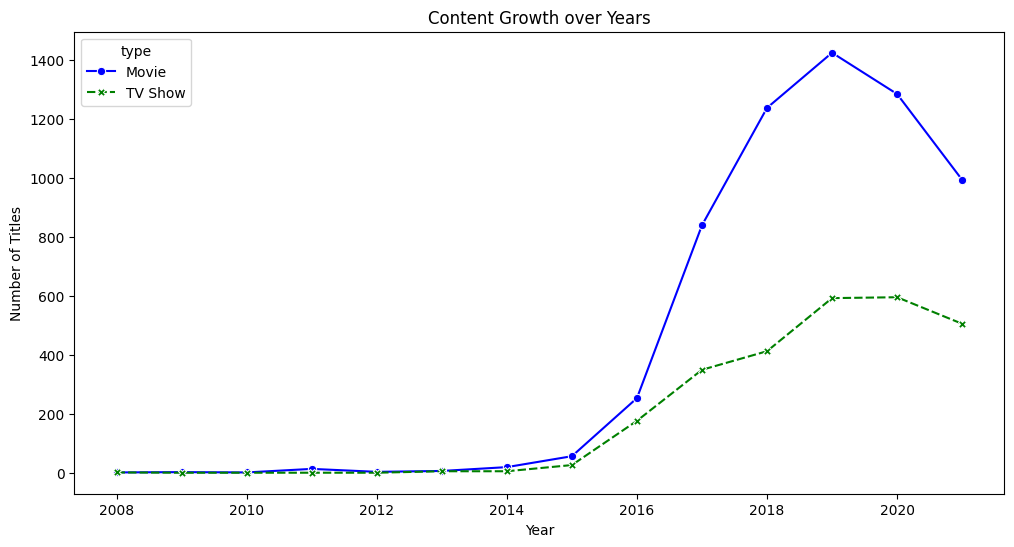

In [10]:
# Seeing growth in contents over the year
grouped = df.groupby(['year_added','type']).size().unstack(fill_value=0)

colors = {'Movie': 'blue', 'TV Show': 'green'}
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, marker='o', markers=True, palette=colors)
plt.title('Content Growth over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

**Insights**
- The content on Netflix saw a significant increase starting in 2013 and continued to grow until 2019. For TV shows, this growth remained steady between 2019 to 2020.
- However, starting in 2019, there was a decline in the addition of movies, while TV show additions started to decrease from 2020 onwards.
- One particularly noteworthy trend is the substantial rise in content additions on Netflix for both movies and TV shows in 2018 and 2019. In 2018, almost 1300 movies were added, followed by an addition of around 1400 movies in 2019.

<br>

### 3. Content added over the year with original released date

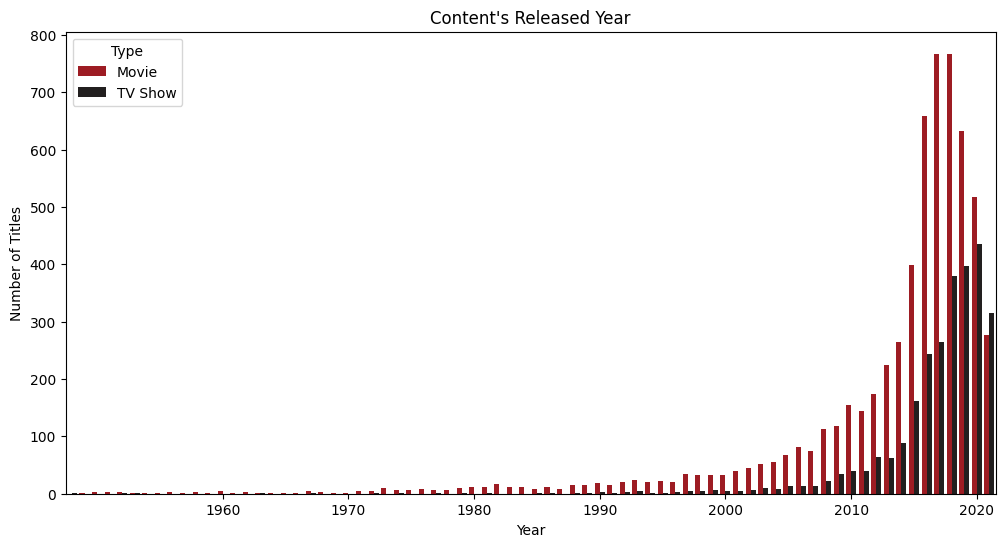

In [11]:
#Grouping by release year and type
grouped= df.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Resetting the index for plotting
grouped= grouped.reset_index().melt(id_vars='release_year', value_vars=['Movie', 'TV Show'], var_name='type', value_name='count')

# Creating plot
plt.figure(figsize=(12,6))
sns.barplot(x='release_year', y='count', hue='type', data=grouped, palette={'Movie': "#b20710", 'TV Show':  "#221f1f"})
plt.title("Content's Released Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.xticks(ticks=['1960', '1970', '1980', '1990', '2000', '2010', '2020'])
plt.legend(title='Type')
plt.show()

**Insights**
- A significant number of movies added to Netflix were primarily released in 2017 and 2018, with over 750 titles. Similarly, a substantial number of TV shows were predominantly released in 2018, 2019 and 2020.
- From both figures, it is evident that the golden era for the cinema and TV show industry was between 2016 and 2020.

<br>

### 4. Content added aggregately over the months.

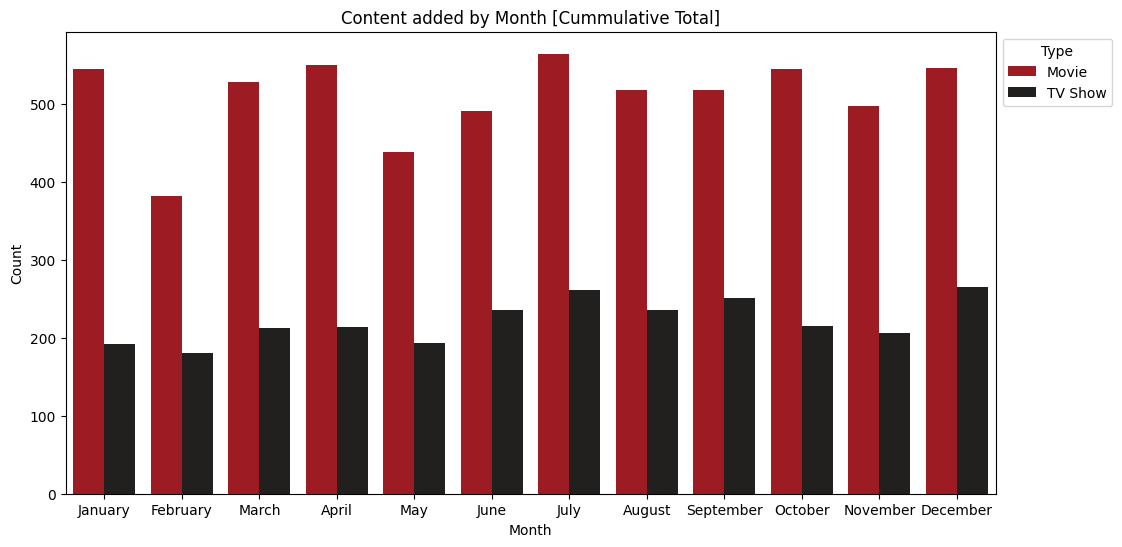

In [12]:
months = ['January',
          'February',
          'March',
          'April',
          'May',
          'June',
          'July',
          'August',
          'September',
          'October',
          'November',
          'December']

grouped = df.groupby(['month_name_added', 'type']).size().reset_index(name='count')  

plt.figure(figsize=(12,6))
sns.barplot(x='month_name_added', y='count', hue='type', data=grouped, order=months, palette={'Movie': "#b20710", 'TV Show': "#221f1f"})
plt.title('Content added by Month [Cummulative Total]')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Type', bbox_to_anchor=(1,1))
plt.show()

**Insights**
- The Netflix's preference for adding content seem to be the months of July and December.

### Oldest Movies and Tv show that are available in Netflix:

In [13]:
old_movie = df.sort_values("release_year", ascending = True)
old_movie = old_movie[old_movie['type'] == "Movie"]
old_movie[['title', 'release_year']][:15]

,title,release_year
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8660,Undercover: How to Operate Behind Enemy Lines,1943
8739,Why We Fight: The Battle of Russia,1943
8763,WWII: Report from the Aleutians,1943
8640,Tunisian Victory,1944
8436,The Negro Soldier,1944
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
7930,San Pietro,1945
7219,Know Your Enemy - Japan,1945


In [14]:
old_show = df.sort_values("release_year", ascending = True)
old_show = old_show[old_show['type'] == "TV Show"]
old_show[['title', 'release_year']][:15]

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
1331,Five Came Back: The Reference Films,1945
7743,Pioneers of African-American Cinema,1946
8541,The Twilight Zone (Original Series),1963
8189,The Andy Griffith Show,1967
4550,Monty Python's Fliegender Zirkus,1972
4551,Monty Python's Flying Circus,1974
6549,Dad's Army,1977
6674,El Chavo,1979
7588,Ninja Hattori,1981


<br>

### 5. Which country have the most content in the Netflix.

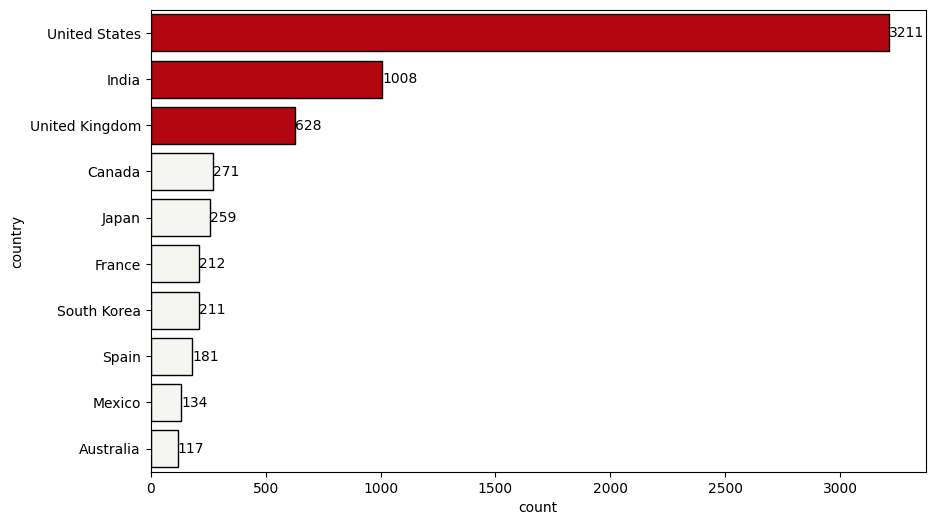

In [15]:
# Contry wise most content

plt.figure(figsize=(10, 6), dpi=100)
ax = sns.countplot(y='country', data=df, order=df['country'].value_counts().index[:10])

# Customizing colors
for i, bar in enumerate(ax.patches):
    if i < 3:
        bar.set_color('#b20710')
        bar.set_edgecolor('black')
    else:
        bar.set_color('#f5f5f1')
        bar.set_edgecolor('black')

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.5, p.get_y() + p.get_height() / 2, f'{int(width)}', ha='left', va='center')

plt.show()

**Insights**
- From the figure, we can clearly see that the USA has the highest amount of content on Netflix, likely because Netflix is a US-based company. India and the UK follow, although they are significantly behind the USA.

<br>

### 6. Distribution of Movie Duration


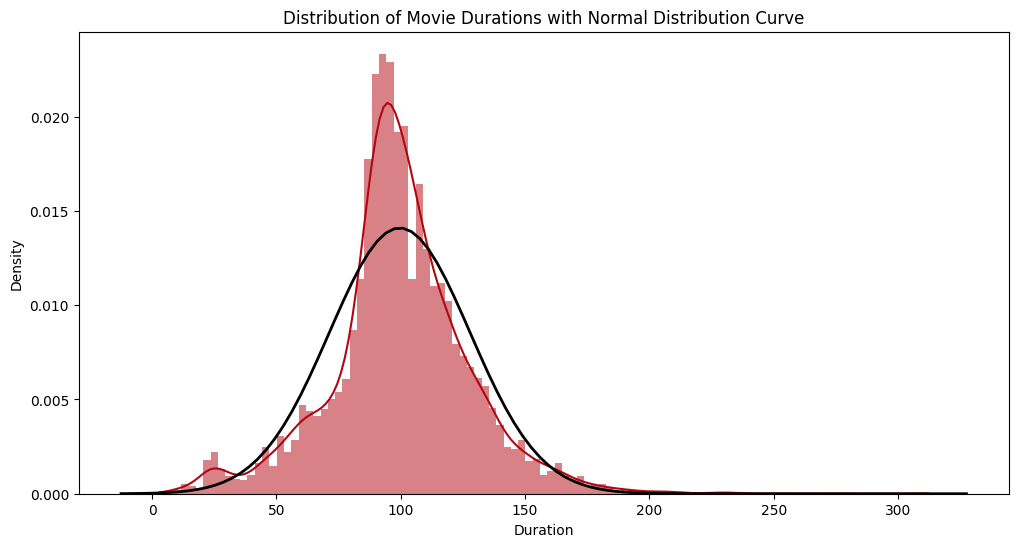

In [16]:
d1 = df[df["type"] == "Movie"]

x1 = d1['duration'].fillna(0.0).astype(float)

# Create the plot
plt.figure(figsize=(12, 6))
sns.histplot(x1, kde=True, stat="density", linewidth=0, color="#b20710")

# Add the normal distribution curve
mean = x1.mean()
std = x1.std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5*((x-mean)/std)**2) / (std * np.sqrt(2*np.pi))
plt.plot(x, p, 'k', linewidth=2)

plt.title('Distribution of Movie Durations with Normal Distribution Curve')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.show()

**Insights**
- Most movies have durations around the central peak, with fewer movies having very short or very long durations.
- The right skew indicates that while most movies have a typical duration, there are some movies with exceptionally long durations, contributing to the tail.
- The deviation from the normal distribution suggests that the movie duration data is not perfectly normally distributed, mainly due to the right skew.

<br>

### 7. Seasons in TV Show

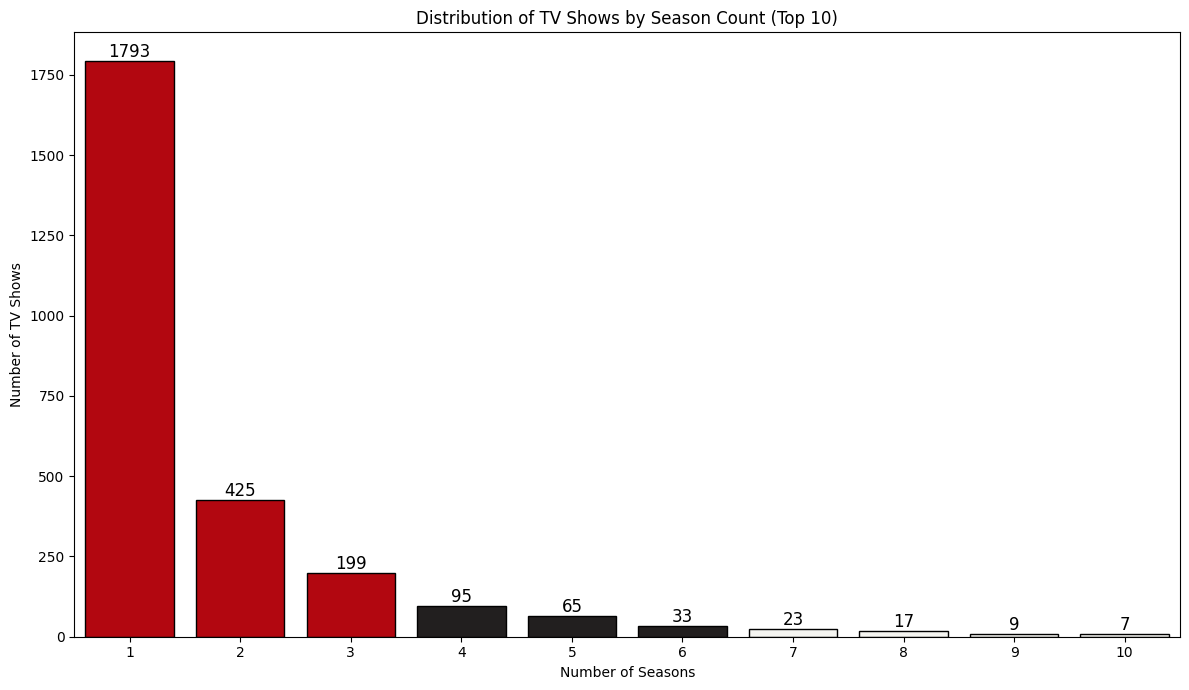

In [17]:
d2 = df[df['type']=='TV Show']

season_counts = d2['season_count'].value_counts()[:10]

plt.figure(figsize=(12, 7))
ax = sns.barplot(data=season_counts)

for i, bar in enumerate(ax.patches):
    if i < 3:
        bar.set_color('#b20710')
        bar.set_edgecolor('black')
    elif i <6:
        bar.set_color("#221f1f")
        bar.set_edgecolor('black')
    else:
        bar.set_color('#f5f5f1')
        bar.set_edgecolor('black')

for p, value in zip(ax.patches, season_counts.values):
    width = value  
    ax.text(p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() * 1.0,
            f'{int(width)}', ha='center', va='bottom', fontsize=12)

plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.title('Distribution of TV Shows by Season Count (Top 10)')
plt.xticks(rotation=0)  
plt.tight_layout()

plt.show()

**Insights**
- On Netflix, a significant portion of TV shows, approximately 1,793, are limited to just one season.

<br>

### 8. How Maturity Ratings are distributed

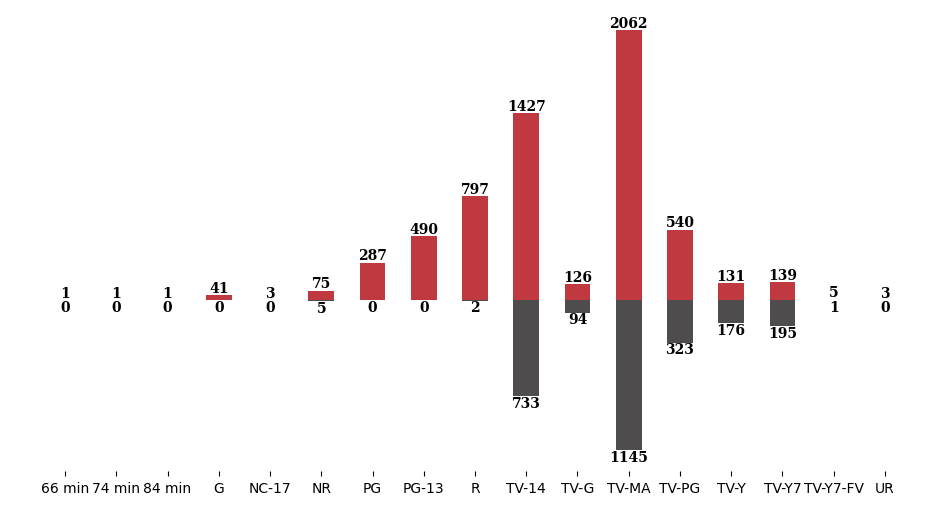

In [18]:
crosstab = pd.crosstab(df['rating'], df['type'])

# Separating movie and TV Show counts and create negative values for TV Shows
movie = crosstab['Movie']
tv = -crosstab['TV Show']

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(movie.index, movie, width=0.5, color='#b20710', alpha=0.8)
ax.bar(tv.index, tv, width=0.5, color='#221f1f', alpha=0.8)

# Annotation
for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i]),
                   va='bottom', ha='center', fontweight='bold', fontfamily='serif',
                   color='black')

for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i]),
                   va='top', ha='center', fontweight='bold', fontfamily='serif',
                   color='black')   

# Removing top, left, right, and bottom spines
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
ax.set_yticks([])
plt.show()


**Insights**
- The figure shows inconsistent data in the form of duration categories, which are relatively uncommon compared to the rating categories.
- A substantial amount of content, both movies and TV shows, is aimed at mature audiences, particularly in the TV-MA category.
- TV-14 and TV-PG ratings have a considerable amount of content, showing a good balance between movies and TV shows targeted towards teenagers and general audiences.
- There is a significantly lower amount of children’s content, particularly for the youngest audiences (TV-Y, TV-Y7 and TV-Y7-FV).
- The R rating has a significant count of 797 movies, indicating a substantial amount of restricted content for mature audiences.
- The ratings NC-17, NR, and UR have very low counts, indicating they are either less common or less significant in the dataset.
- PG and G these categories have lower counts, with 287 and 75 movies respectively, indicating fewer family-friendly or general audience movies.

<br>

### 9. Discussing on types of Genre in the Netflix

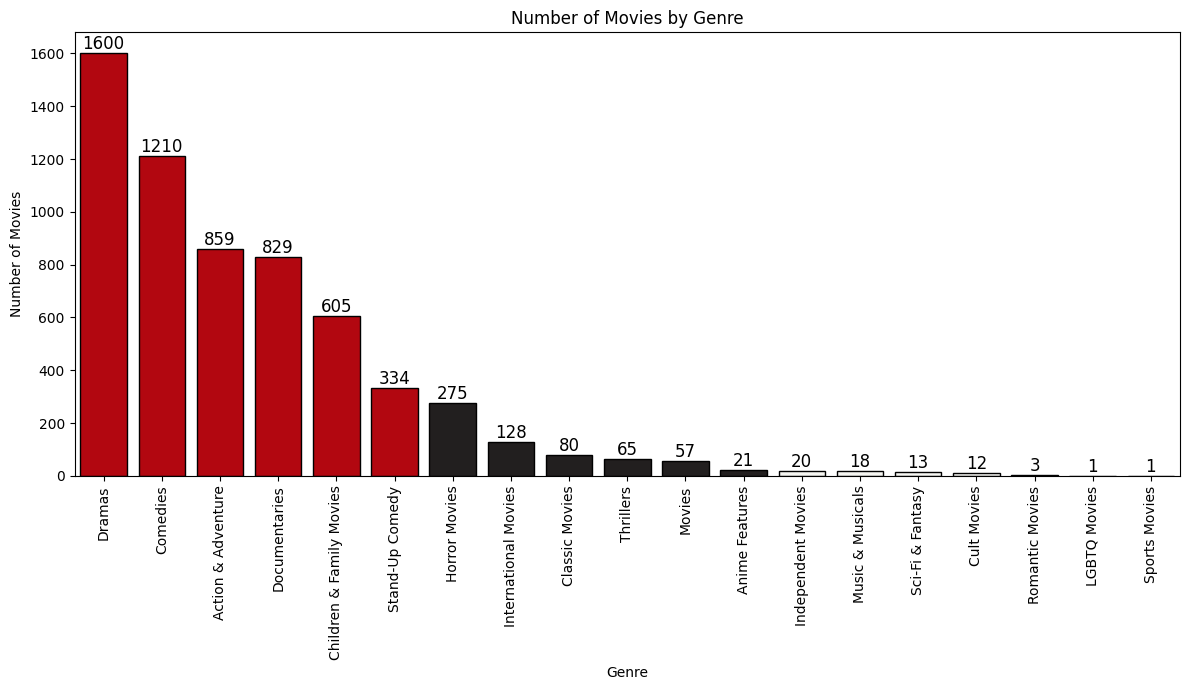

In [19]:
# Genre for movie

# plotting
grouped = d1['listed_in'].value_counts()

plt.figure(figsize=(12, 7))
ax = sns.barplot(data=grouped)

for i, bar in enumerate(ax.patches):
    if i < 6:
        bar.set_color('#b20710')
        bar.set_edgecolor('black')
    elif i <12:
        bar.set_color("#221f1f")
        bar.set_edgecolor('black')
    else:
        bar.set_color('#f5f5f1')
        bar.set_edgecolor('black')

for p, value in zip(ax.patches, grouped.values):
    width = value  
    ax.text(p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() * 1.0,
            f'{int(width)}', ha='center', va='bottom', fontsize=12)

plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre')
plt.xticks(rotation='vertical')  
plt.tight_layout()

plt.show()

**Insights**
- Most movies listed on Netflix belong to the Drama genre, followed by Comedies, Action & Adventure, and Documentaries. Romantic, LGBTQ, and Sports movies have significantly lower representation.

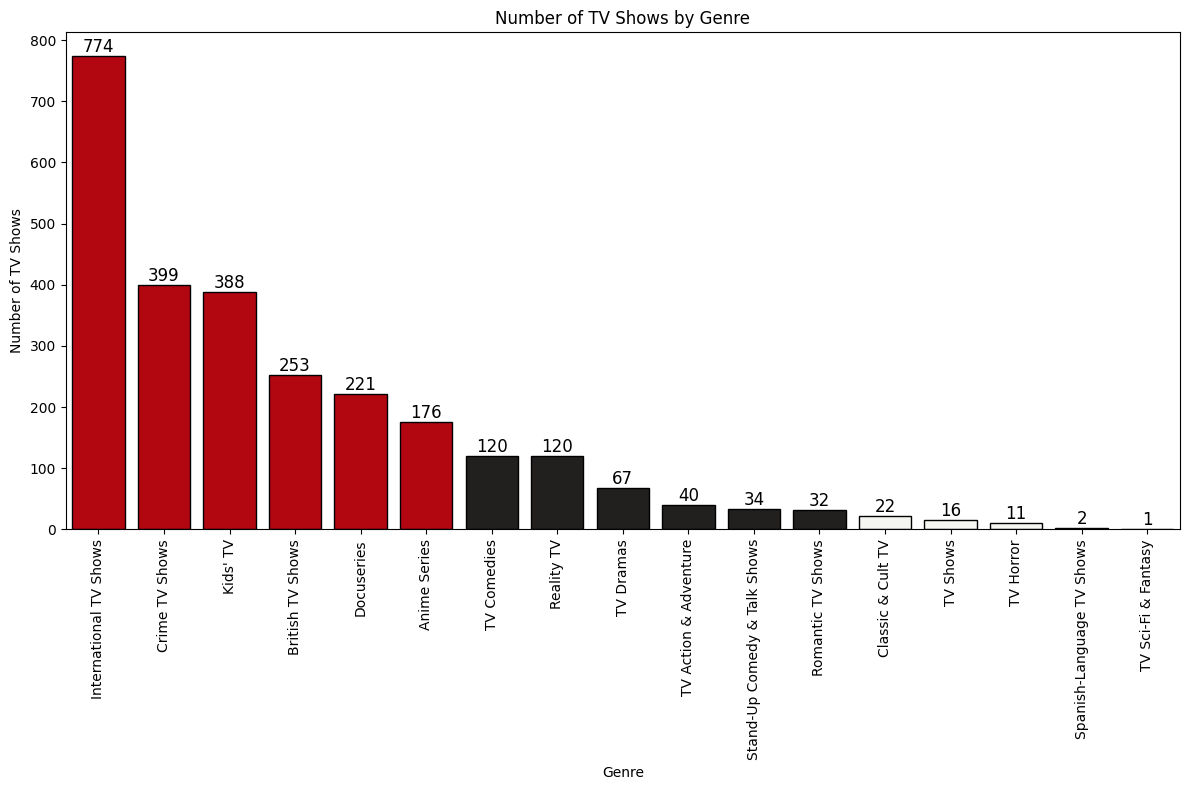

In [20]:
# Genre for TV Show
grouped = d2['listed_in'].value_counts()

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=grouped)

for i, bar in enumerate(ax.patches):
    if i < 6:
        bar.set_color('#b20710')
        bar.set_edgecolor('black')
    elif i <12:
        bar.set_color("#221f1f")
        bar.set_edgecolor('black')
    else:
        bar.set_color('#f5f5f1')
        bar.set_edgecolor('black')

for p, value in zip(ax.patches, grouped.values):
    width = value  
    ax.text(p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() * 1.0,
            f'{int(width)}', ha='center', va='bottom', fontsize=12)

plt.xlabel('Genre')
plt.ylabel('Number of TV Shows')
plt.title('Number of TV Shows by Genre')
plt.xticks(rotation='vertical')  
plt.tight_layout()

plt.show()

**Insights**
- The International TV Shows genre is exceedingly prevalent, with the second most common genre comprising only about 50% of its count. Sci-Fi & Fantasy genres and Spanish Language TV Shows are notably underrepresented in TV shows.

<br>

### 10. Year wise which genre is increasing.

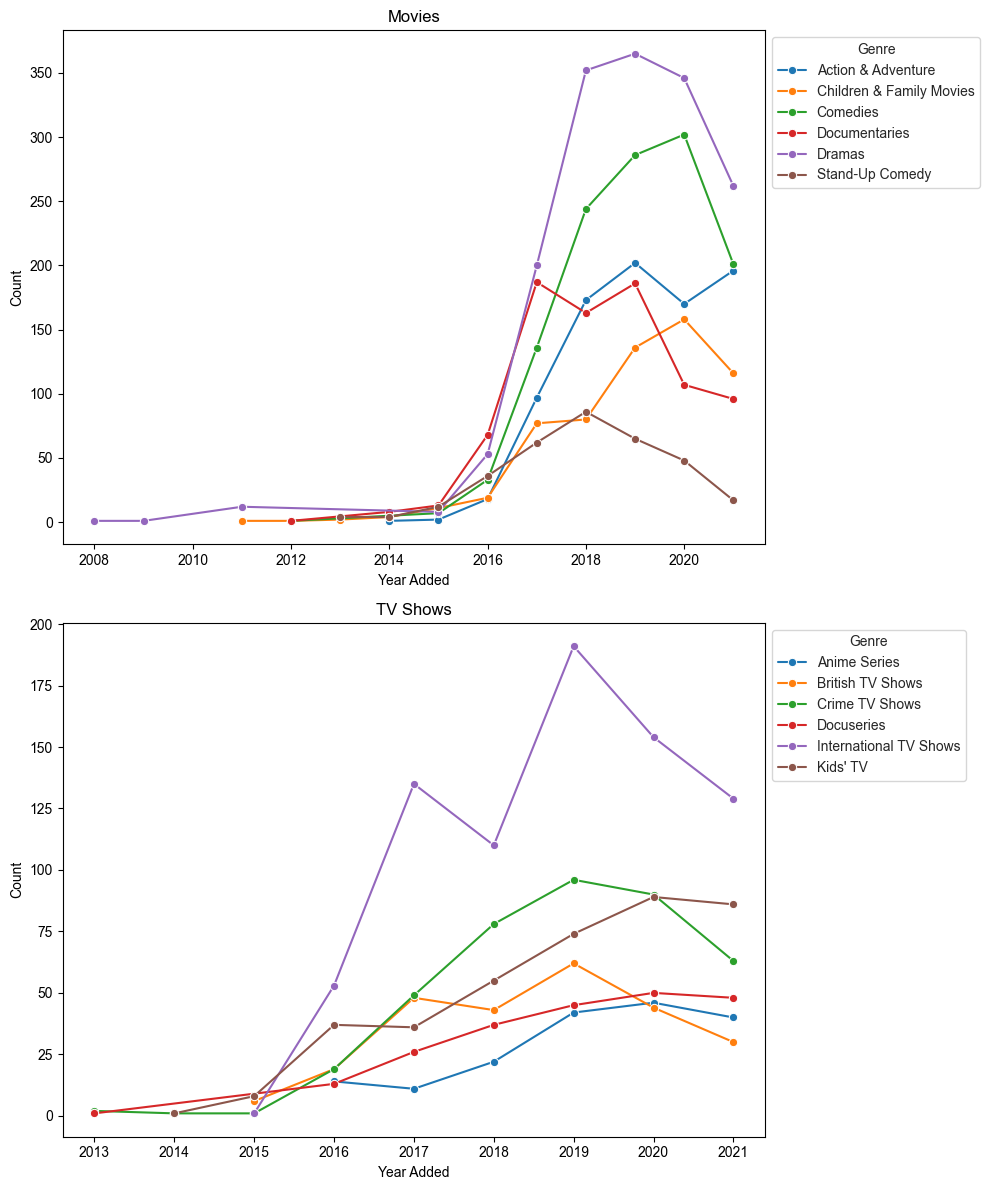

In [21]:
# Function for get top genres
def get_top_genres(df, content_type, top_n=6):
    count_df = df[df['type']==content_type].groupby(['listed_in', 'year_added']).size().reset_index(name='count' if content_type == 'Movie' else 'counts')
    top_genres = count_df.groupby('listed_in')['count' if content_type == 'Movie' else 'counts'].sum().nlargest(top_n).index
    return count_df[count_df['listed_in'].isin(top_genres)]
    

# Geting top genres data
movies_count = get_top_genres(df, 'Movie')
tv_shows_count = get_top_genres(df, 'TV Show')

# Plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))
sns.set_style("whitegrid")

# Plot function
def plot_genres(ax, data, title, y_label, color_palette):
    sns.set_palette(color_palette)
    for genre in data['listed_in'].unique():
        genre_data = data[data['listed_in'] == genre]
        sns.lineplot(x='year_added', y='count' if 'count' in genre_data.columns else 'counts', data=genre_data, ax=ax, label=genre, marker='o')
    ax.set_title(title)
    ax.set_xlabel('Year Added')
    ax.set_ylabel(y_label)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Genre')

# Plotting movies
plot_genres(axes[0], movies_count, 'Movies', 'Count', "husl")

# Plotting TV shows
plot_genres(axes[1], tv_shows_count, 'TV Shows', 'Count', "husl")

plt.tight_layout()
plt.show()


**Insights**
- **Movies**:
    - There is significant increase in the number of movies added from around 2015 onwards, peaking around 2018-2019, followed by slight decline.
    - Action & Adventure and Comedies are the most prominennt genres, especially around the peak years.
    - Documentaries and Dramas also see noticeable growth but at a slightly lower rate.
    - Children & Family Movies and Stand-Up Comedy have a more modest increase but are still consistently added.

- **TV Shows**:
    - Similar to movies, there is a noticeable increase in the number of TV Shows added from around 2015, with a peak around 2017-2018, and then a decline.
    - International TV Shows show a significant increase, indicating a growing interest in diverse, global content.
    - Drama TV Shows and Documentaries are also popular, showing consistent growth and high numbers around the peak years.
    - Kids' TV and Anime Series show moderate growth but are still significant in terms of count.
    - British TV Shows and Crime TV Shows see a steady increase, indicating niche but steady interest.

- **General Observations**:
    - The sharp increase from 2015 to 2018/19 suggets a stategic push to expand the content library during these years.
    - Action & Adventure, Comedies, Internation TV Shows, and Drama TV Shows appear to be the most consistently popular genres.
    - The decline in the number of additions post-2019 may be influenced by COVID-19 where all content industries and other industries were stopped.


<br>

### 11. Which Director have most movie and tv show

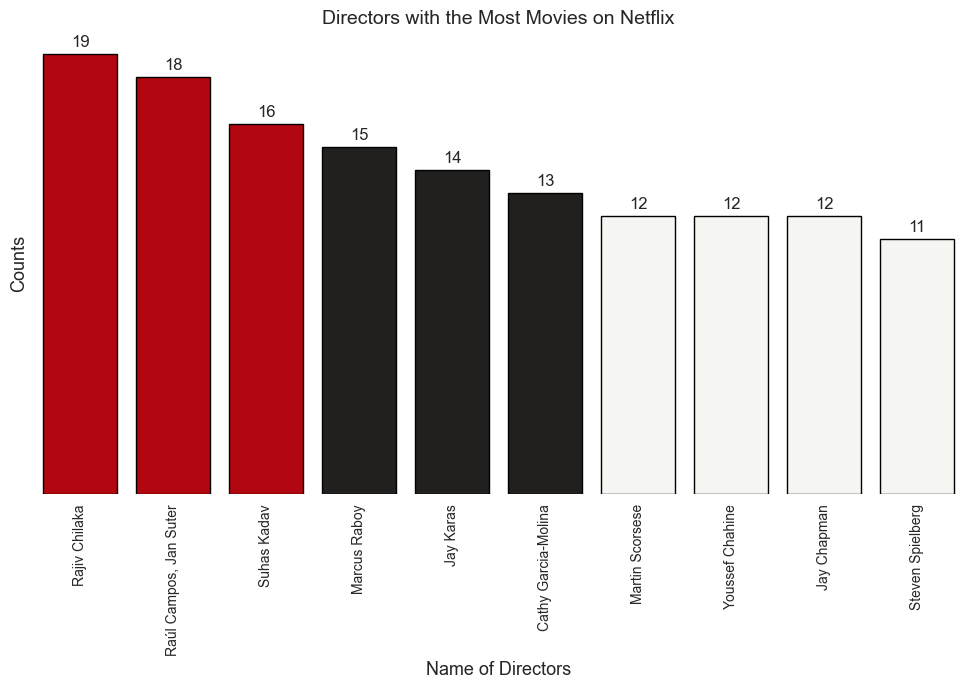

In [22]:
movie_dir_counts = d1['director'].value_counts().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.set_style('white')
ax = sns.barplot(x='director', y='count', data=movie_dir_counts, hue='director')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=12)

for i, bar in enumerate(ax.patches):
    if i < 3:
        bar.set_color('#b20710')
        bar.set_edgecolor('black')
    elif i <6:
        bar.set_color("#221f1f")
        bar.set_edgecolor('black')
    else:
        bar.set_color('#f5f5f1')
        bar.set_edgecolor('black')


plt.title('Directors with the Most Movies on Netflix', fontsize=14)
plt.xlabel('Name of Directors', fontsize=13)
plt.ylabel('Counts', fontsize=13)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
ax.set_yticks([])
plt.xticks(rotation='vertical')
plt.show()

**Insights**
- Rajiv Chilaka has made a substantial contribution to Netflix with 19 movies. Similarly, Raul Campos has 18 movies listed on the platform, just one fewer than Jan Suter.

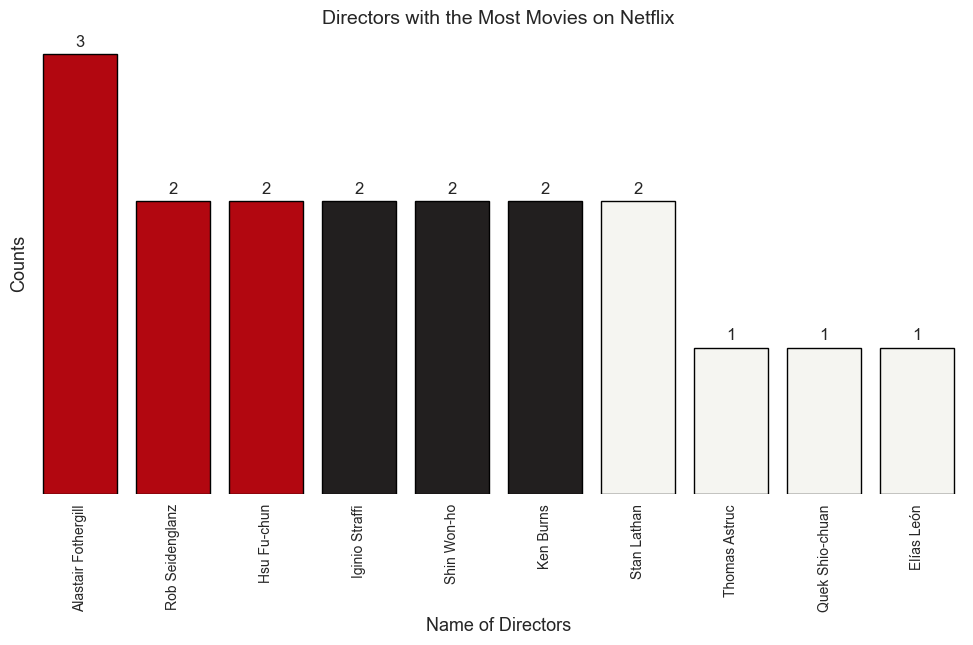

In [23]:
tv_dir_counts = d2['director'].value_counts().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.set_style('white')
ax = sns.barplot(x='director', y='count', data=tv_dir_counts, hue='director')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=12)

for i, bar in enumerate(ax.patches):
    if i < 3:
        bar.set_color('#b20710')
        bar.set_edgecolor('black')
    elif i <6:
        bar.set_color("#221f1f")
        bar.set_edgecolor('black')
    else:
        bar.set_color('#f5f5f1')
        bar.set_edgecolor('black')


plt.title('Directors with the Most Movies on Netflix', fontsize=14)
plt.xlabel('Name of Directors', fontsize=13)
plt.ylabel('Counts', fontsize=13)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
ax.set_yticks([])
plt.xticks(rotation='vertical')
plt.show()

<br>